Вадим Кузьмин БПМ-142

In [1]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.simplefilter("ignore", UserWarning)

## Dataset information

Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print arXiv and covers __scientific collaborations between authors papers__ submitted to General Relativity and Quantum Cosmology category. 

If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

In [2]:
G=nx.read_edgelist('ca-GrQc.txt', nodetype=int)

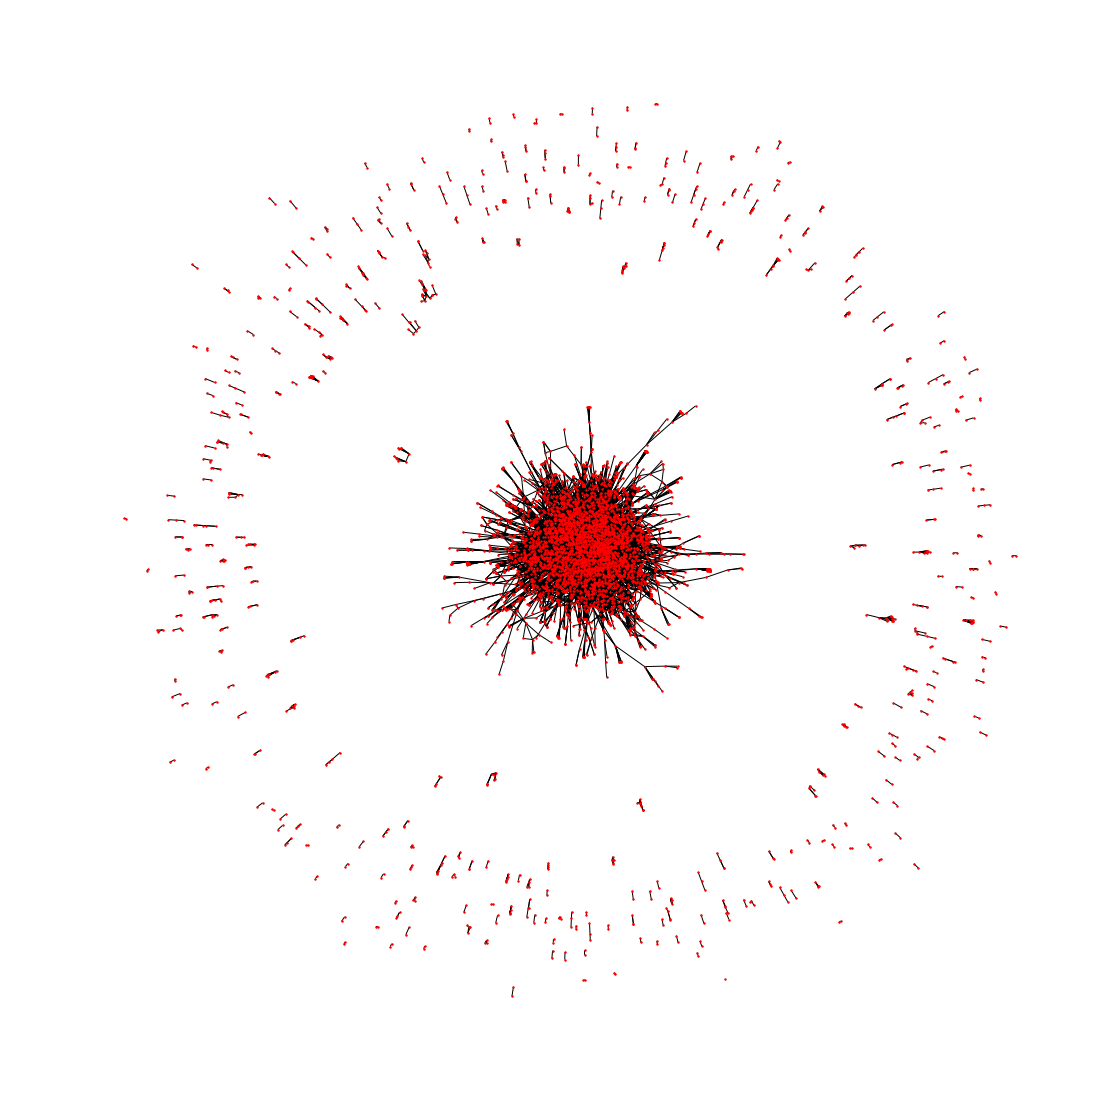

In [9]:
plt.figure(figsize = (15,15))
nx.draw(G, node_size=2)

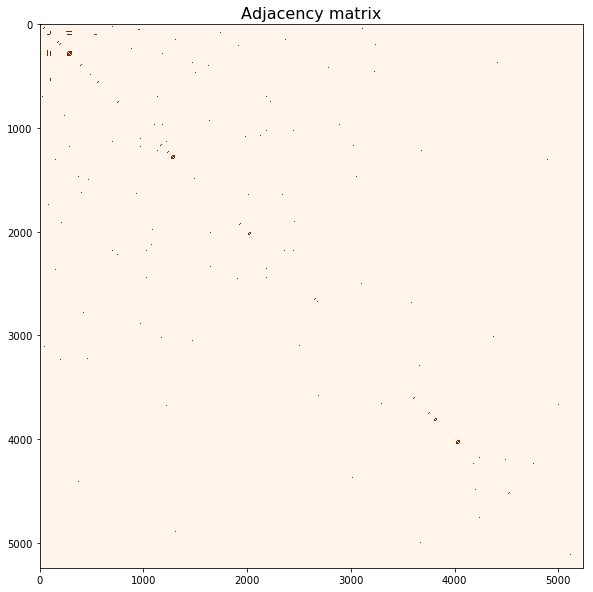

In [16]:
A=nx.adjacency_matrix(G).todense().getA()
plt.figure(figsize = (10,10))
plt.title("Adjacency matrix", fontsize=16)
plt.imshow(A,interpolation='none', cmap='Oranges')

# Задание 1

Вычислите ее топологические свойства (число вершин, число ребер, плотность, радиус, диаметр, ассортативность, средний кратчайший путь, транзитивность, средний коэффициент кластеризации)

In [21]:
n_comp = nx.number_connected_components(G)
print("Number of connected components: {}".format(n_comp))

Number of connected components: 355


* Граф несвязный $\Rightarrow$ сначала вычислим тополлогические свойства, которые возможно вычислить для несвязного графа

In [24]:
print("Number of nodes: %d" % nx.number_of_nodes(G))
print("Number of edges: %d" % nx.number_of_edges(G))
print("Density: %s" % nx.density(G))
print("Assortativity: %s" % nx.degree_assortativity_coefficient(G))
print("Transitivity: %s" % nx.transitivity(G))
print("Average clustering: %s" % nx.average_clustering(G))

Number of nodes: 5242
Number of edges: 14496
Density: 0.001055278280507905
Assortativity: 0.659164032093
Transitivity: 0.6298424741263426
Average clustering: 0.529635811052136


In [47]:
import operator

comp_len = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

def frequencyDistribution(data):
    return {i: data.count(i) for i in data}  

d = frequencyDistribution(comp_len)
sorted_d = sorted(d.items(), key=operator.itemgetter(0),reverse=True)

print("Распределение по компонентам:\n")
for i, k in sorted_d:
    print("Число вершин: {}, кол-во компонент: {}".format(i,k))

Распределение по компонентам:

Число вершин: 4158, кол-во компонент: 1
Число вершин: 14, кол-во компонент: 1
Число вершин: 12, кол-во компонент: 1
Число вершин: 10, кол-во компонент: 1
Число вершин: 9, кол-во компонент: 2
Число вершин: 8, кол-во компонент: 6
Число вершин: 7, кол-во компонент: 8
Число вершин: 6, кол-во компонент: 12
Число вершин: 5, кол-во компонент: 17
Число вершин: 4, кол-во компонент: 30
Число вершин: 3, кол-во компонент: 98
Число вершин: 2, кол-во компонент: 177
Число вершин: 1, кол-во компонент: 1


* посчитаем радиус, диаметр и средний кратчайший путь для самой большой компоненты, потом для всех и усредним

In [62]:
max_comp = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]

In [63]:
print("Radius: %d" % nx.radius(max_comp))
print("Diameter: %d" % nx.diameter(max_comp))
print("Average shortest path: %s" % nx.average_shortest_path_length(max_comp))

Radius: 9
Diameter: 17
Average shortest path: 6.049380016182999


In [67]:
rad_list, diam_list, avg_sh_p_list = [],[], []
for comp in nx.connected_component_subgraphs(G):
    rad_list.append(nx.radius(comp))
    diam_list.append(nx.diameter(comp))
    if len(comp) > 1:
        avg_sh_p_list.append(nx.average_shortest_path_length(comp))

In [70]:
print("Average radius: {}".format(np.array(rad_list).mean()))
print("Average diameter: {}".format(np.array(diam_list).mean()))
print("Average of average shortest path: {}".format(np.sum(avg_sh_p_list)/n_comp))

Average radius: 1.0619718309859154
Average diameter: 1.3690140845070422
Average of average shortest path: 1.13330591617015


# Задание 2

Постройте распределения
* по степени связности
* распределение коэффициента кластеризации
* распределение центральности

Какой статистике подчиняются эти распределения, сделайте предположения, подтвердите их соответствующей аппроксимацией (здесь речь идет в первую очередь о распределении по степеням degree distribution)

## 2.1 Degree distribution

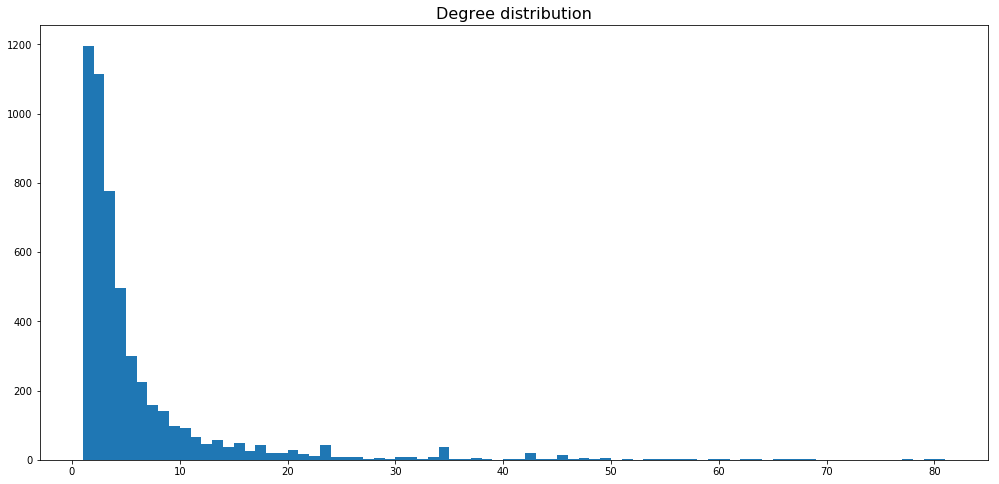

In [163]:
degree_sequence=sorted(nx.degree(G).values(),reverse=True)
b=max(degree_sequence)-min(degree_sequence)
plt.figure(figsize = (17,8))
plt.title("Degree distribution", fontsize=16)
counts, bins, bars =  plt.hist(degree_sequence, bins=b)

__Предположение - экспоненциалное распределение__

Будем аппроксимировать функцией вида: \begin{equation} y(x) = ae^{-bx} + c \end{equation}

array([  1.77618707e+03,   3.12471335e-01,   4.99497969e+00])

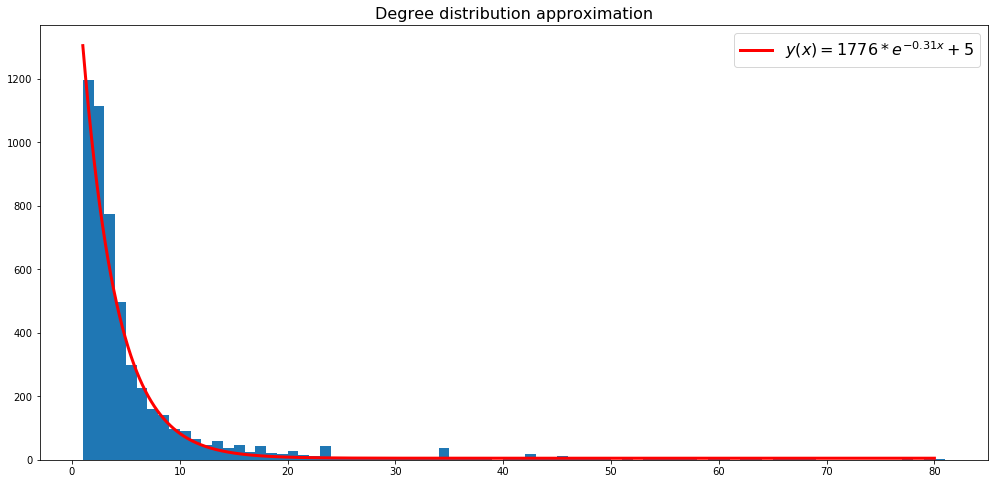

In [199]:
from scipy.optimize import curve_fit
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c
popt, pcov = curve_fit(exponenial_func, bins[:-1], counts, p0=(1, 0.1, 1))
xs = np.linspace(1, 80, 10000)

plt.figure(figsize = (17,8))
plt.title("Degree distribution approximation", fontsize=16)
plt.plot(xs, exponenial_func(xs, *popt), label = "$y(x) = 1776*e^{-0.31x} + 5$", lw = 3, color = 'r')
counts2, bins2, bars2 =  plt.hist(degree_sequence, bins=b)
plt.legend(prop={'size': 16})
popt

__Нарисуем в двойном логарифмическом масштабе__

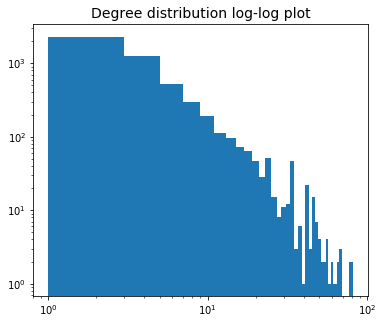

In [197]:
plt.figure(figsize = (6,5))
counts3, bins3, bars3 = plt.hist(degree_sequence, bins=40)
plt.yscale('log')
plt.xscale('log')
plt.title("Degree distribution log-log plot", fontsize=14)
#plt.plot(bins3[:-1], counts3)

__Аппроксимируем прямой__

Coefs: [ 9.29362903 -2.02558501]
Показатель примерно = 2


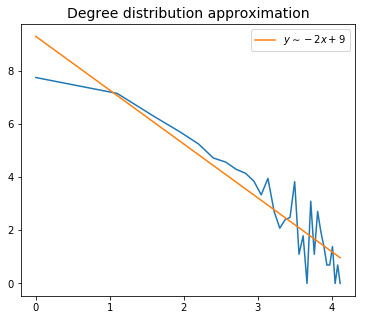

In [202]:
x = np.log(bins3[:-10])
y = np.log(counts3[:-9])
from numpy.polynomial import polynomial as poly
coefs = poly.polyfit(x, y,1)
ffit = poly.polyval(x, coefs)
plt.figure(figsize = (6,5))
plt.plot(x,y)
plt.plot(x, ffit, label = "$y \sim -2x + 9$")
plt.legend()
plt.title("Degree distribution approximation", fontsize=14)
print("Coefs:", coefs)
print("Показатель примерно = 2")

## 2.2 Clustering coefficient distribution

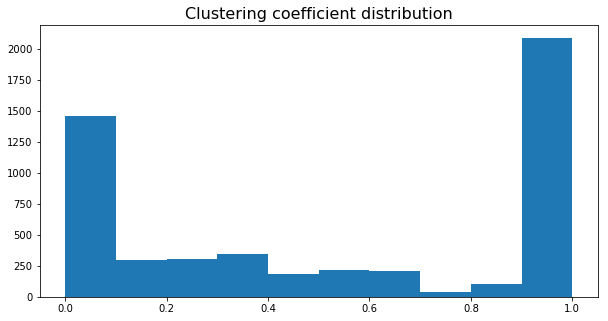

In [220]:
clustering_sequence = sorted(nx.clustering(G).values(),reverse=True)
plt.figure(figsize = (10,5))
plt.title("Clustering coefficient distribution", fontsize=16)
counts, bins, bars =  plt.hist(clustering_sequence, bins=10)

Из гистограммы установить закон распределения не удалось

## 2.3 Centrality distribution

In [223]:
centrality_sequence = sorted(nx.betweenness_centrality(G).values(),reverse=True)

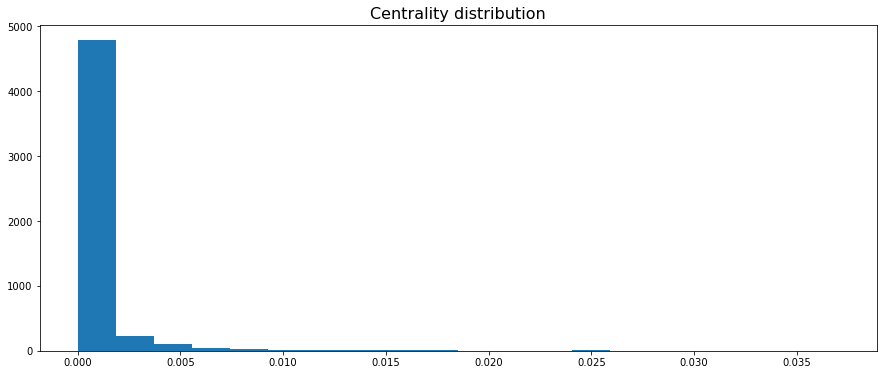

In [227]:
plt.figure(figsize = (15,6))
plt.title("Centrality distribution", fontsize=16)
counts, bins, bars =  plt.hist(centrality_sequence, bins=20)

array([ 4775.16273261,  1655.85684757,    11.66491441])

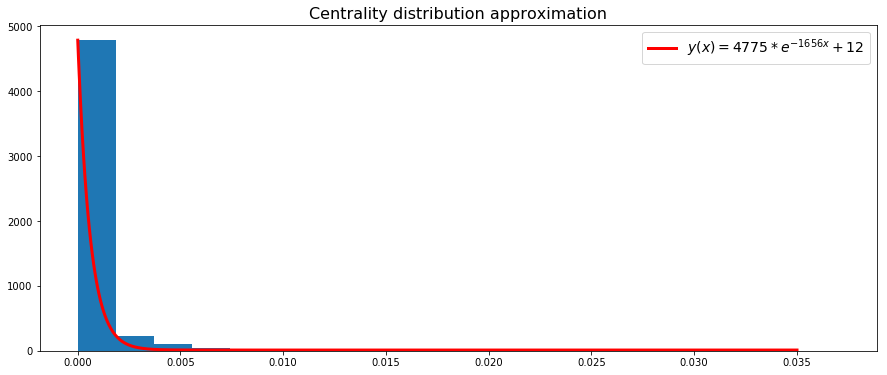

In [233]:
popt, pcov = curve_fit(exponenial_func, bins[:-1], counts, p0=(1, 0.1, 1))
xs = np.linspace(0, 0.035, 1000)

plt.figure(figsize = (15,6))
plt.title("Centrality distribution approximation", fontsize=16)
plt.plot(xs, exponenial_func(xs, *popt), label = "$y(x) = 4775*e^{-1656x} + 12$", lw = 3, color = 'r')
counts2, bins2, bars2 =  plt.hist(centrality_sequence, bins=20)
plt.legend(prop={'size': 14})
popt

# Задание 3

Смоделируйте случайные сети с таким же числом вершин и такой же плотностью: случайная сеть Эрдеша-Реньи, случайная сеть Барабаши-Альберта. Для ансамбля таких сетей определите средние значения топологических характеристик, сравните с выбранной сетью (пункт 1). Какая модель описывает свойства лучше?

In [284]:
print("Для выбранной сети:\n")
print("Number of nodes: %d" % nx.number_of_nodes(G))
print("Number of edges: %d" % nx.number_of_edges(G))
print("Density: %s" % nx.density(G))
print("Assortativity: %s" % nx.degree_assortativity_coefficient(G))
print("Transitivity: %s" % nx.transitivity(G))
print("Average clustering: %s" % nx.average_clustering(G))
print("Radius: %d" % 9)
print("Diameter: %d" % 17)
print("Average shortest path: %s" % 6.049380016182999)

Для выбранной сети:

Number of nodes: 5242
Number of edges: 14496
Density: 0.001055278280507905
Assortativity: 0.659164032093
Transitivity: 0.6298424741263426
Average clustering: 0.529635811052136
Radius: 9
Diameter: 17
Average shortest path: 6.049380016182999


In [285]:
n = nx.number_of_nodes(G)
p = nx.density(G)
n,p

(5242, 0.001055278280507905)

## 3.1 Случайная сеть Эрдеша-Реньи

In [242]:
from tqdm import tqdm

Радиус, диаметр и средний кратчайший путь будем вычислять для самой большой компоненты

In [243]:
edg, dens, assort, transit, avg_clust, rad, diam, avg_sh_p  = [], [], [], [], [], [], [], []
for i in tqdm(range(10)):
    g = nx.erdos_renyi_graph(n,p)
    edg.append(nx.number_of_edges(g))
    dens.append(nx.density(g))
    assort.append(nx.degree_assortativity_coefficient(g))
    transit.append(nx.transitivity(g))
    avg_clust.append(nx.average_clustering(g))
    max_comp = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)[0]
    rad.append(nx.radius(max_comp))
    diam.append(nx.diameter(max_comp))
    avg_sh_p.append(nx.average_shortest_path_length(max_comp))

100%|██████████| 10/10 [14:41<00:00, 88.15s/it]


In [247]:
print("Усредненные характеристики:\n")
print("Edges: %d" % np.mean(edg))
print("Density: %s" % np.mean(dens))
print("Assortativity: %s" % np.mean(assort))
print("Transitivity: %s" % np.mean(transit))
print("Average clustering: %s" % np.mean(avg_clust))
print("Radius: %d" % np.mean(rad))
print("Diameter: %d" % np.mean(diam))
print("Average shortest path: %s" % np.mean(avg_sh_p))

Усредненные характеристики:

Density: 0.00105168206451
Assortativity: -0.000605194187906
Transitivity: 0.00103738153478
Average clustering: 0.000989666889133
Radius: 7
Diameter: 10
Average shortest path: 5.21058273836


## Задание 4

(дополнительно) к распределениям пункта 2 добавьте распределения, характерные для ансамбля случайных сетей из пункта 3. Какая модель лучше описывает локальные свойства выбранной сети?

In [276]:
G1 = nx.erdos_renyi_graph(n,p)

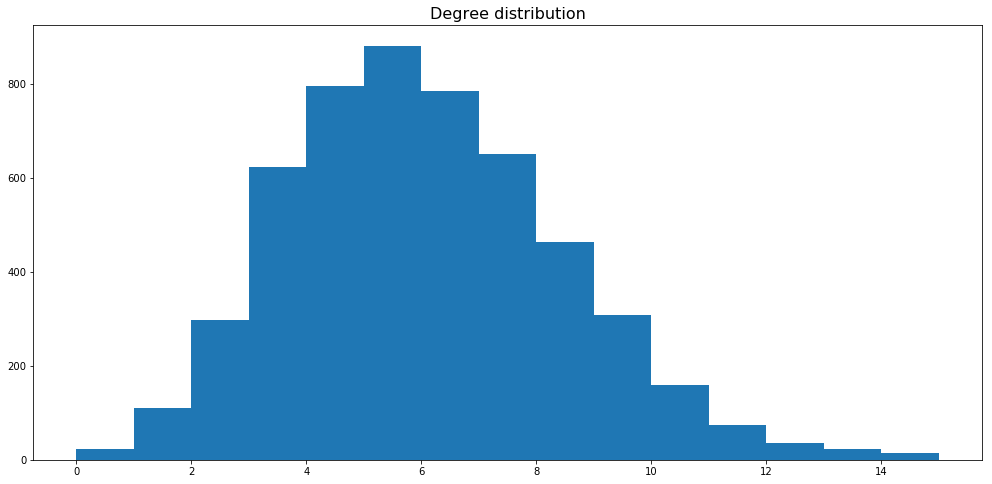

In [279]:
degree_sequence=sorted(nx.degree(G1).values(),reverse=True)
b=max(degree_sequence)-min(degree_sequence)
plt.figure(figsize = (17,8))
plt.title("Degree distribution", fontsize=16)
counts, bins, bars =  plt.hist(degree_sequence, bins=b)

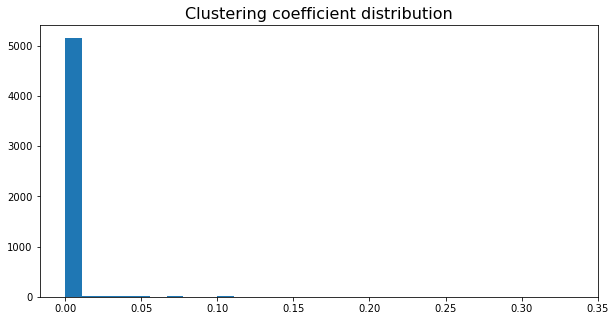

In [288]:
clustering_sequence = sorted(nx.clustering(G1).values(),reverse=True)
plt.figure(figsize = (10,5))
plt.title("Clustering coefficient distribution", fontsize=16)
counts, bins, bars =  plt.hist(clustering_sequence, bins=30)

In [281]:
centrality_sequence = sorted(nx.betweenness_centrality(G1).values(),reverse=True)

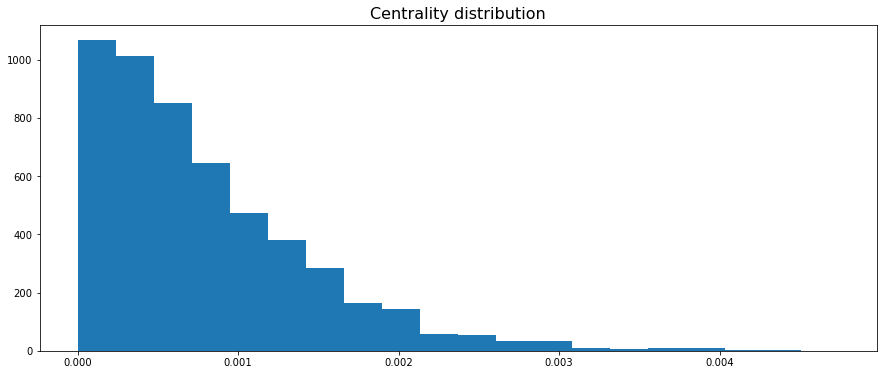

In [282]:
plt.figure(figsize = (15,6))
plt.title("Centrality distribution", fontsize=16)
counts, bins, bars =  plt.hist(centrality_sequence, bins=20)

__Вывод:__ Модель случайной сети Эрдеша-Реньи плохо описывает выбранную сеть, так как числовые характеристики значительно различаются, а степени узла имеют совершенно разные распределения, как и распределения для центральности 

## 3.2 Cлучайная сеть Барабаши-Альберта

Определим m, чтобы плотность была наиболее близка к нашей сети

In [260]:
for i in range(1,10):
    g = nx.barabasi_albert_graph(n,i)
    print(i, ":",p - nx.density(g))

1 : 0.0006737445147696373
2 : 0.0002923563448206227
3 : -8.888622933913843e-05
4 : -0.00046998320770964656
5 : -0.000850934590290901
6 : -0.0012317403770829023
7 : -0.0016124005680856503
8 : -0.0019929151632991455
9 : -0.0023732841627233867


Будем использовать $m = 3$

In [262]:
edg2, dens2, assort2, transit2, avg_clust2, rad2, diam2, avg_sh_p2  = [], [], [], [], [], [], [], []
for i in range(10):
    g = nx.barabasi_albert_graph(n,3)
    edg2.append(nx.number_of_edges(g))
    dens2.append(nx.density(g))
    assort2.append(nx.degree_assortativity_coefficient(g))
    transit2.append(nx.transitivity(g))
    avg_clust2.append(nx.average_clustering(g))
    max_comp2 = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)[0]
    rad2.append(nx.radius(max_comp2))
    diam2.append(nx.diameter(max_comp2))
    avg_sh_p2.append(nx.average_shortest_path_length(max_comp2))

In [263]:
print("Усредненные характеристики:\n")
print("Edges: %d" % np.mean(edg2))
print("Density: %s" % np.mean(dens2))
print("Assortativity: %s" % np.mean(assort2))
print("Transitivity: %s" % np.mean(transit2))
print("Average clustering: %s" % np.mean(avg_clust2))
print("Radius: %d" % np.mean(rad2))
print("Diameter: %d" % np.mean(diam2))
print("Average shortest path: %s" % np.mean(avg_sh_p2))

Усредненные характеристики:

Edges: 15717
Density: 0.00114416450985
Assortativity: -0.0455209677907
Transitivity: 0.0047434942062
Average clustering: 0.00868691042255
Radius: 4
Diameter: 7
Average shortest path: 4.07942452682


## Задание 4

In [264]:
G2 = nx.barabasi_albert_graph(n,3)

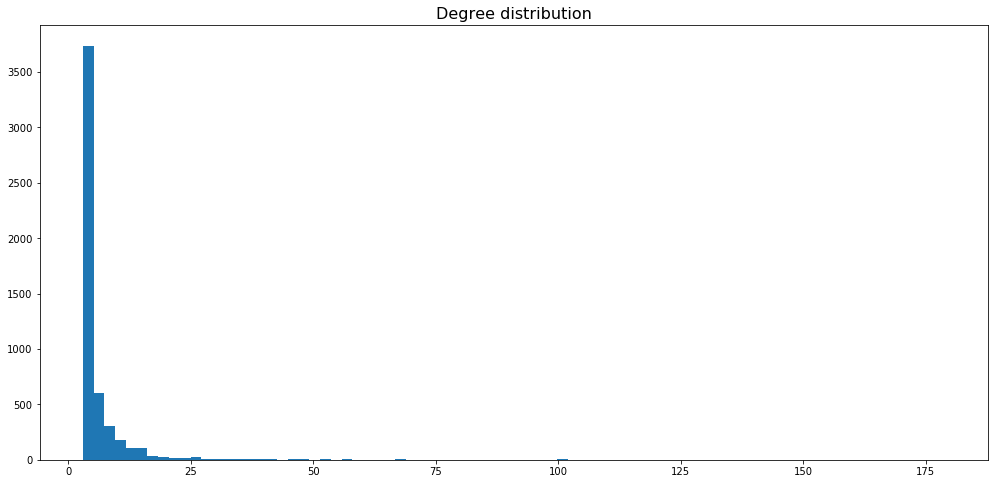

In [275]:
degree_sequence=sorted(nx.degree(G2).values(),reverse=True)
b=max(degree_sequence)-min(degree_sequence)
plt.figure(figsize = (17,8))
plt.title("Degree distribution", fontsize=16)
counts, bins, bars =  plt.hist(degree_sequence, bins=80)

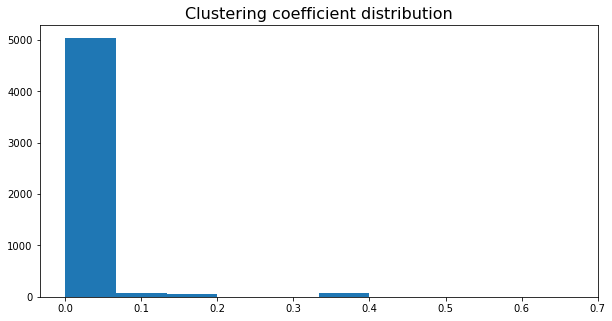

In [266]:
clustering_sequence = sorted(nx.clustering(G2).values(),reverse=True)
plt.figure(figsize = (10,5))
plt.title("Clustering coefficient distribution", fontsize=16)
counts, bins, bars =  plt.hist(clustering_sequence, bins=10)

In [267]:
centrality_sequence = sorted(nx.betweenness_centrality(G2).values(),reverse=True)

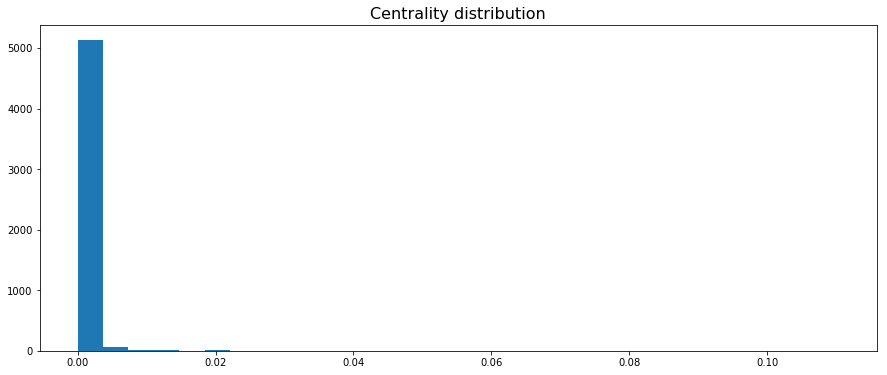

In [274]:
plt.figure(figsize = (15,6))
plt.title("Centrality distribution", fontsize=16)
counts, bins, bars =  plt.hist(centrality_sequence, bins=30)

__Вывод:__ Модель случайной сети Барабаши-Альберта __лучше__ описывает выбранную сеть, так как распределения для степеней и центральности близки, хотя имеются сильные различия в распределении для коэффициента кластеризации.